In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from utils import *

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
%run Analise_survey.ipynb

In [3]:
dados.head(2)

,GENERO,RENDA,PROFISSAO,TEMPO_ULTIMO_APARELHO,IMPORTANCIA,OITO_1,OITO_2,OITO_3,OITO_4,OITO_5,...,PARADEIRO_ANTIGO,HIBERNACAO,RECICLAGEM,PRECO_ATUAL,NOVO_ATRAI,PROMOCAO,NOTA_ATUAL,SATISFSACAO_NOVO,TEMPO_ESPERADO,DURACAO_ESPERADA
0,2,3300,0,24.0,5.0,2,2,0,2,0,...,0,1,2,1850,0.0,2,7.0,9.0,36.0,2
1,1,22000,0,12.0,5.0,0,1,1,3,0,...,1,1,2,9450,8.0,1,7.0,8.0,60.0,0


In [4]:
#lista de varíaveis do cluster
lista_variaveis = ['GENERO','RENDA','PROFISSAO','TEMPO_ULTIMO_APARELHO', 'IMPORTANCIA','OITO_1','OITO_2','OITO_3','OITO_4','OITO_5','OITO_6','OITO_7','OITO_8','MOTIVO_TROCA','CONSIDERA_CONSERTO','PARADEIRO_ANTIGO','HIBERNACAO','RECICLAGEM','PRECO_ATUAL','NOVO_ATRAI','PROMOCAO','NOTA_ATUAL','SATISFSACAO_NOVO','TEMPO_ESPERADO','DURACAO_ESPERADA'] 

#dataframe filtrado
df_filter = dados[lista_variaveis]

#preenche Nan com a mediana da coluna
imputer = SimpleImputer(strategy='median')
imputer.fit(df_filter)
temp = imputer.transform(df_filter)
df_filter_nan = pd.DataFrame(temp, columns=df_filter.columns)

In [5]:
df_filter_nan.head()

,GENERO,RENDA,PROFISSAO,TEMPO_ULTIMO_APARELHO,IMPORTANCIA,OITO_1,OITO_2,OITO_3,OITO_4,OITO_5,...,PARADEIRO_ANTIGO,HIBERNACAO,RECICLAGEM,PRECO_ATUAL,NOVO_ATRAI,PROMOCAO,NOTA_ATUAL,SATISFSACAO_NOVO,TEMPO_ESPERADO,DURACAO_ESPERADA
0,2.0,3300.0,0.0,24.0,5.0,2.0,2.0,0.0,2.0,0.0,...,0.0,1.0,2.0,1850.0,0.0,2.0,7.0,9.0,36.0,2.0
1,1.0,22000.0,0.0,12.0,5.0,0.0,1.0,1.0,3.0,0.0,...,1.0,1.0,2.0,9450.0,8.0,1.0,7.0,8.0,60.0,0.0
2,1.0,22000.0,0.0,30.0,9.0,0.0,4.0,0.0,0.0,4.0,...,5.0,4.0,1.0,3500.0,0.0,2.0,7.0,8.0,24.0,0.0
3,2.0,16500.0,0.0,24.0,4.0,0.0,0.0,0.0,3.0,3.0,...,0.0,1.0,0.0,6000.0,1.0,2.0,10.0,10.0,36.0,1.0
4,2.0,22000.0,1.0,12.0,10.0,0.0,0.0,0.0,3.0,2.0,...,0.0,4.0,2.0,9450.0,8.0,2.0,0.0,0.0,36.0,0.0


In [6]:
df_filter_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENERO                 159 non-null    float64
 1   RENDA                  159 non-null    float64
 2   PROFISSAO              159 non-null    float64
 3   TEMPO_ULTIMO_APARELHO  159 non-null    float64
 4   IMPORTANCIA            159 non-null    float64
 5   OITO_1                 159 non-null    float64
 6   OITO_2                 159 non-null    float64
 7   OITO_3                 159 non-null    float64
 8   OITO_4                 159 non-null    float64
 9   OITO_5                 159 non-null    float64
 10  OITO_6                 159 non-null    float64
 11  OITO_7                 159 non-null    float64
 12  OITO_8                 159 non-null    float64
 13  MOTIVO_TROCA           159 non-null    float64
 14  CONSIDERA_CONSERTO     159 non-null    float64
 15  PARADE

In [7]:
print("Tenho Nan no dataset: {0}".format(df_filter_nan.isnull().values.any()))

Tenho Nan no dataset: False


In [8]:
#define os pontos no espaço
three_means = cluster.MiniBatchKMeans(n_clusters=3)

In [9]:
#fit no algoritmo
three_means.fit(df_filter_nan)

C:\Users\fernando.fincatti\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=3)

In [10]:
saida = three_means.predict(df_filter_nan)

In [11]:
df_filter_nan['cluster'] = saida

In [12]:
df_filter_nan.head()

,GENERO,RENDA,PROFISSAO,TEMPO_ULTIMO_APARELHO,IMPORTANCIA,OITO_1,OITO_2,OITO_3,OITO_4,OITO_5,...,HIBERNACAO,RECICLAGEM,PRECO_ATUAL,NOVO_ATRAI,PROMOCAO,NOTA_ATUAL,SATISFSACAO_NOVO,TEMPO_ESPERADO,DURACAO_ESPERADA,cluster
0,2.0,3300.0,0.0,24.0,5.0,2.0,2.0,0.0,2.0,0.0,...,1.0,2.0,1850.0,0.0,2.0,7.0,9.0,36.0,2.0,1
1,1.0,22000.0,0.0,12.0,5.0,0.0,1.0,1.0,3.0,0.0,...,1.0,2.0,9450.0,8.0,1.0,7.0,8.0,60.0,0.0,0
2,1.0,22000.0,0.0,30.0,9.0,0.0,4.0,0.0,0.0,4.0,...,4.0,1.0,3500.0,0.0,2.0,7.0,8.0,24.0,0.0,0
3,2.0,16500.0,0.0,24.0,4.0,0.0,0.0,0.0,3.0,3.0,...,1.0,0.0,6000.0,1.0,2.0,10.0,10.0,36.0,1.0,2
4,2.0,22000.0,1.0,12.0,10.0,0.0,0.0,0.0,3.0,2.0,...,4.0,2.0,9450.0,8.0,2.0,0.0,0.0,36.0,0.0,0


In [13]:
df_filter_nan.cluster.value_counts(True)

0    0.628931
2    0.194969
1    0.176101
Name: cluster, dtype: float64

In [16]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_filter_nan)
    distortions.append(kmeanModel.inertia_)

C:\Users\fernando.fincatti\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


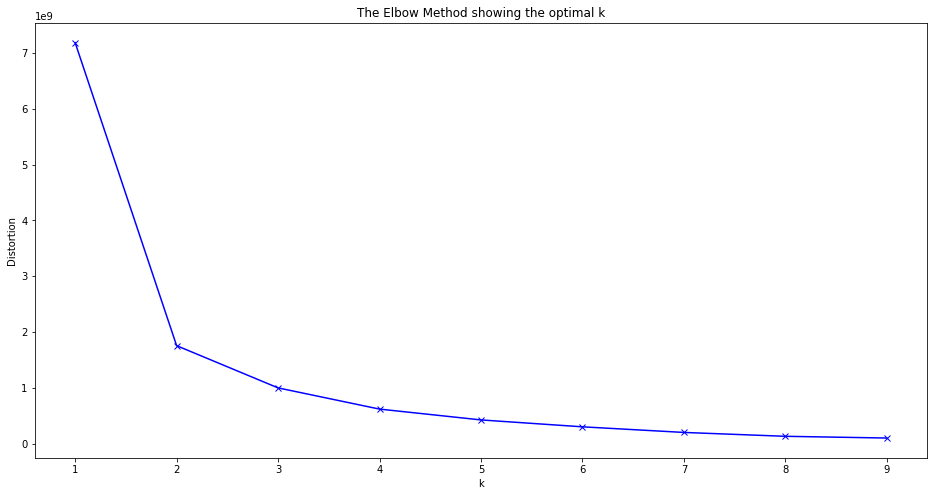

In [17]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
#define os pontos no espaço
three_means = cluster.MiniBatchKMeans(n_clusters=2)

#fit no algoritmo
three_means.fit(df_filter_nan)
saida = three_means.predict(df_filter_nan)
df_filter_nan['cluster'] = saida
df_filter_nan.cluster.value_counts(True)

In [ ]:
#define os pontos no espaço
three_means = cluster.MiniBatchKMeans(n_clusters=3)

#fit no algoritmo
three_means.fit(df_filter_nan)
saida = three_means.predict(df_filter_nan)
df_filter_nan['cluster'] = saida
df_filter_nan.cluster.value_counts(True)

In [ ]:
#define os pontos no espaço
three_means = cluster.MiniBatchKMeans(n_clusters=9)

#fit no algoritmo
three_means.fit(df_filter_nan)
saida = three_means.predict(df_filter_nan)
df_filter_nan['cluster'] = saida
df_filter_nan.cluster.value_counts(True)

In [ ]:
#define os pontos no espaço
three_means = cluster.MiniBatchKMeans(n_clusters=4)

#fit no algoritmo
three_means.fit(df_filter_nan)
saida = three_means.predict(df_filter_nan)
df_filter_nan['cluster'] = saida
df_filter_nan.cluster.value_counts(True)

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(df_filter_nan)
kmeans = KMeans(init="k-means++", n_clusters=k, n_init=2)
kmeans.fit(reduced_data)

In [ ]:
df_filter_nan.head()

In [ ]:
lista = df_filter_nan.cluster.unique().tolist()

In [ ]:
lista

In [ ]:
cluster0 = df_filter_nan.loc[df_filter_nan['cluster']==0]
cluster0

In [ ]:
df_filter_nan.to_excel("cluster_4.xlsx")